## **Table Of Contents**
> 1. [Notebook Imports](#1)
> 2. [Importing Data](#2)
> 3. [Visualizing the Images](#3)
> 4. [Baseline Model](#4)
> 5. [Visualizing the Results](#5)
> 6. [Adding a Max Pooling Layer](#6)
> 7. [Data Augmentation](#7)
> 8. [Improving the Model](#8)
> 9. [Transfer Learning](#9)

<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Notebook Imports
<a class="anchor" id="1"></a> 

In [2]:
#installing tensorflow hub
# !pip install "tensorflow>=2.0.0"
# !pip install --upgrade tensorflow-hub

In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import tensorflow_hub as hub
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)


<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Importing Data
<a class="anchor" id="2"></a> 

In [2]:
# Getting names of the classes we have
data_dir= pathlib.Path('./Df/Binary')
class_names = [item.name for item in data_dir.glob('*')][:2]
print(class_names)

['Not_Photo', 'Photo']


In [3]:
photo_dir = './Df/Binary/Photo' 
not_photo_dir = './Df/Binary/Not_Photo'


<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Visualizing the images
<a class="anchor" id="3"></a> 

In [4]:
# Defining data generator without Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 33125 images belonging to 2 classes.
Found 8281 images belonging to 2 classes.


In [5]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [6]:
# i=0
# for image_batch, labels_batch in train_data:
#     i+=1
# #     print(image_batch.shape)
# print(i)

In [7]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))
   
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.title('\n\n'+class_names[label] )
        plt.imshow(image)

        i += 1
        if i == 21:
            break
    
    plt.tight_layout()       
    plt.suptitle("Randomly picked images from training set", fontsize=16, fontweight="bold")
    plt.show()

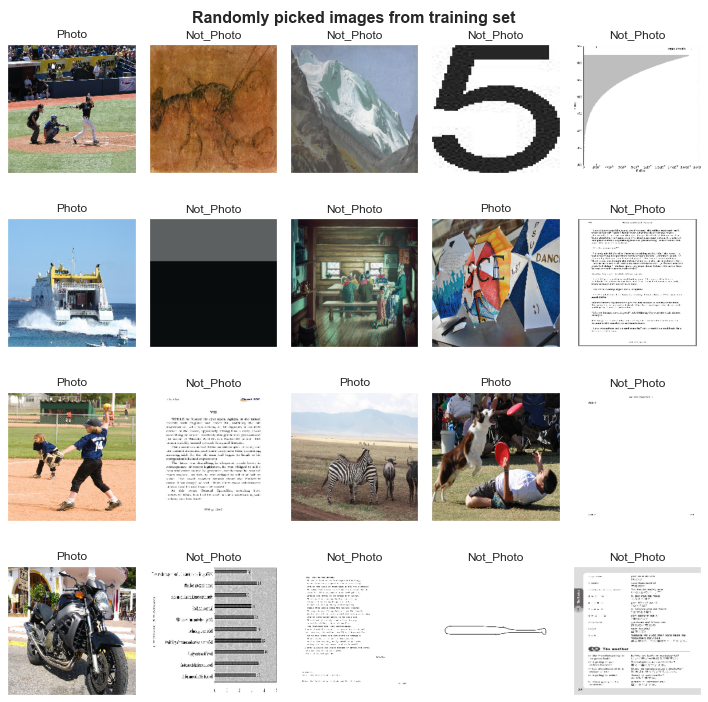

In [8]:
plot_random_images()


<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Baseline Model
<a class="anchor" id="4"></a> 

#### 1. Commençons par créer un modèle de base sans faire d'augmentation de données et sans ajouter de MaxPooling Layer

In [9]:
tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape = (224, 224, 3)), # Input layer    
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # First Convolutional layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # Second Convolutional layer
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer  
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 4,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

#saving the first basic model


Epoch 1/4
1036/1036 [==============================] - 1346s 1s/step - loss: 0.3777 - accuracy: 0.8488 - val_loss: 0.6503 - val_accuracy: 0.6366
Epoch 2/4
1036/1036 [==============================] - 1340s 1s/step - loss: 0.1387 - accuracy: 0.9474 - val_loss: 0.5855 - val_accuracy: 0.7581
Epoch 3/4
1036/1036 [==============================] - 1390s 1s/step - loss: 0.0531 - accuracy: 0.9850 - val_loss: 0.9549 - val_accuracy: 0.7153
Epoch 4/4
1036/1036 [==============================] - 1472s 1s/step - loss: 0.0254 - accuracy: 0.9937 - val_loss: 0.9972 - val_accuracy: 0.7598



<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Visualizing the results 
<a class="anchor" id="5"></a> 

In [34]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

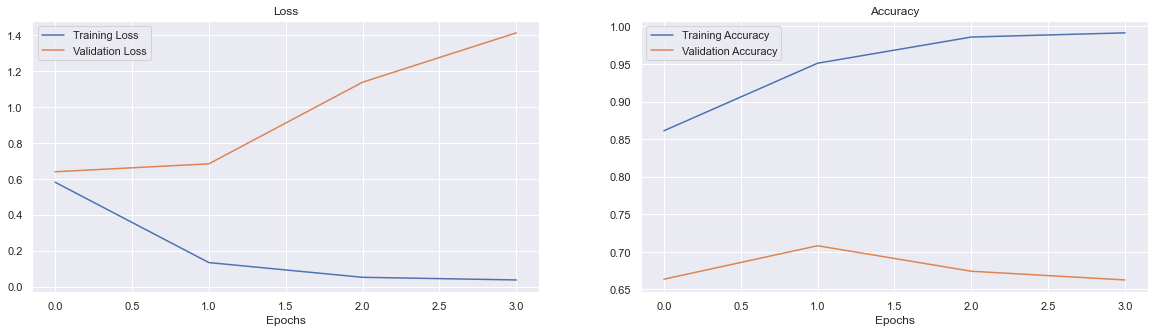

In [35]:
plot_loss_curves(history_1)

##### 1.2. Ajoutons la couche de Maxpooling 


<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Adding a Max Pooling layer
<a class="anchor" id="6"></a> 


In [36]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),   
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), 
    MaxPool2D(pool_size = 2), # It will reduce the number of features by half
    Conv2D(filters = 32, kernel_size =2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')  
])

model_2.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
1036/1036 [==============================] - 898s 866ms/step - loss: 0.2909 - accuracy: 0.8461 - val_loss: 0.6636 - val_accuracy: 0.5945
Epoch 2/5
1036/1036 [==============================] - 775s 748ms/step - loss: 0.2056 - accuracy: 0.9090 - val_loss: 0.5216 - val_accuracy: 0.7716
Epoch 3/5
1036/1036 [==============================] - 606s 584ms/step - loss: 0.1559 - accuracy: 0.9361 - val_loss: 0.4993 - val_accuracy: 0.7913
Epoch 4/5
1036/1036 [==============================] - 748s 722ms/step - loss: 0.1094 - accuracy: 0.9575 - val_loss: 0.6436 - val_accuracy: 0.7487
Epoch 5/5
1036/1036 [==============================] - 682s 659ms/step - loss: 0.0788 - accuracy: 0.9719 - val_loss: 0.6768 - val_accuracy: 0.7753


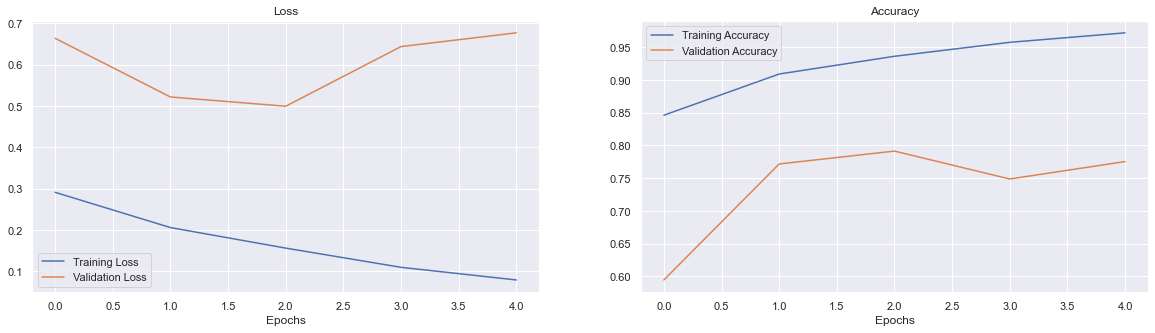

In [37]:
plot_loss_curves(history_2)

#### Nous avons une maximum validation accuracy d'environ 75 %, ce qui représente une amélioration par rapport à notre modèle précédent. Passons au Data augmentation et voyons si cela améliore encore la précision.



<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Data Augmentation
<a class="anchor" id="7"></a> 

In [9]:
# Defining data generator with Data Augmentation
data_gen_augmented = ImageDataGenerator(rescale = 1/255., 
                                        validation_split = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip= True,
                                        rotation_range = 20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)

# train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


print('Augmented training Images:')
train_data_augmented = data_gen_augmented.flow_from_directory(data_dir, 
                                                              target_size = (224, 224), 
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'binary')


#validation data should not be augmented!
print('Unchanged Validation Images:')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Augmented training Images:
Found 33125 images belonging to 2 classes.
Unchanged Validation Images:
Found 8281 images belonging to 2 classes.


In [15]:
model_3 = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented, # changing the training data
                        epochs= 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 39s 767ms/step - loss: 0.7129 - accuracy: 0.5832 - val_loss: 0.6086 - val_accuracy: 0.6760
Epoch 2/5
50/50 [==============================] - 39s 768ms/step - loss: 0.6379 - accuracy: 0.6404 - val_loss: 0.5705 - val_accuracy: 0.7194
Epoch 3/5
50/50 [==============================] - 39s 777ms/step - loss: 0.6123 - accuracy: 0.6525 - val_loss: 0.5411 - val_accuracy: 0.7628
Epoch 4/5
50/50 [==============================] - 39s 788ms/step - loss: 0.6028 - accuracy: 0.6722 - val_loss: 0.6162 - val_accuracy: 0.6786
Epoch 5/5
50/50 [==============================] - 38s 770ms/step - loss: 0.5871 - accuracy: 0.6944 - val_loss: 0.5481 - val_accuracy: 0.7219


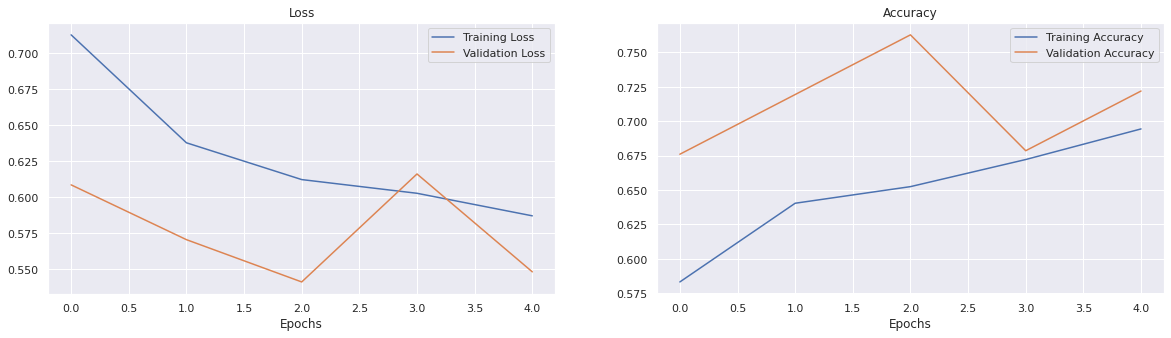

In [16]:
plot_loss_curves(history_3)

#### Nous avons atteint une " maximum accuracy " supérieure à 70 %, nous pouvons certainement apporter d'autres modifications et essayer d'améliorer encore la précision


<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Improving the Model
<a class="anchor" id="8"></a> 

Il y a beaucoup de méthodes d'amélioration à apporter telles que :
- Increasing the number of epochs 
- Adding more convolutional layers 
- Changing the number of filters 
- Changing the size of our filters 
- Changing the pool size of Max Pooling layer 

In [ ]:
model_4 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 10, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 64, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data, # Using non-augmented data
                        epochs= 15,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

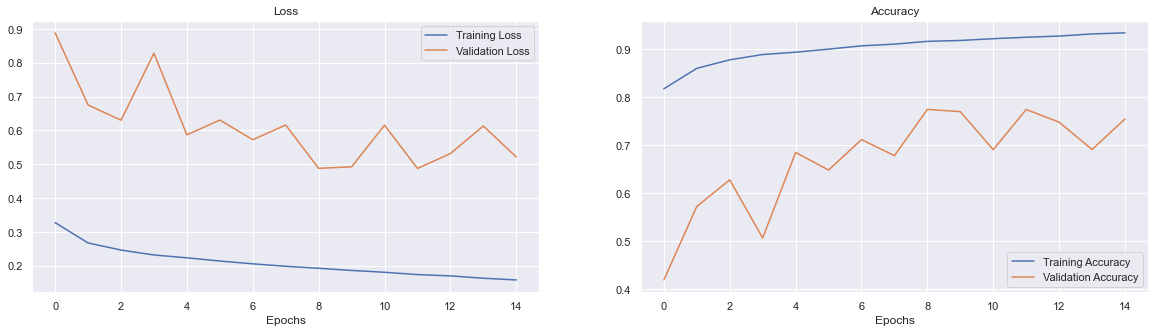

In [41]:
plot_loss_curves(history_4)



<div style='color: #EC7272;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:20px;
           text-align:center;
           font-weight:600 ;
           border-style: solid;
           border-color: #EC7272;
           font-family: "Verdana";'>
Transfer Learning
<a class="anchor" id="9"></a> 

## EfficientNetB7 pretained model

In [10]:
# EfficientNetB7 feature vector
url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(url,
                                         trainable=False,
                                         input_shape=(224, 224, 3))

model_5 = Sequential([
    feature_extractor_layer,
    Dense(1, activation = 'sigmoid')
])

model_5.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 5,
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
1036/1036 [==============================] - 6826s 7s/step - loss: 0.0929 - accuracy: 0.9705 - val_loss: 0.1401 - val_accuracy: 0.9478
Epoch 2/5
1036/1036 [==============================] - 9327s 9s/step - loss: 0.0512 - accuracy: 0.9835 - val_loss: 0.1339 - val_accuracy: 0.9501
Epoch 3/5
1036/1036 [==============================] - 62144s 60s/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.1239 - val_accuracy: 0.9546
Epoch 4/5
1036/1036 [==============================] - 6688s 6s/step - loss: 0.0398 - accuracy: 0.9868 - val_loss: 0.1107 - val_accuracy: 0.9592
Epoch 5/5
1036/1036 [==============================] - 6318s 6s/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.1223 - val_accuracy: 0.9551


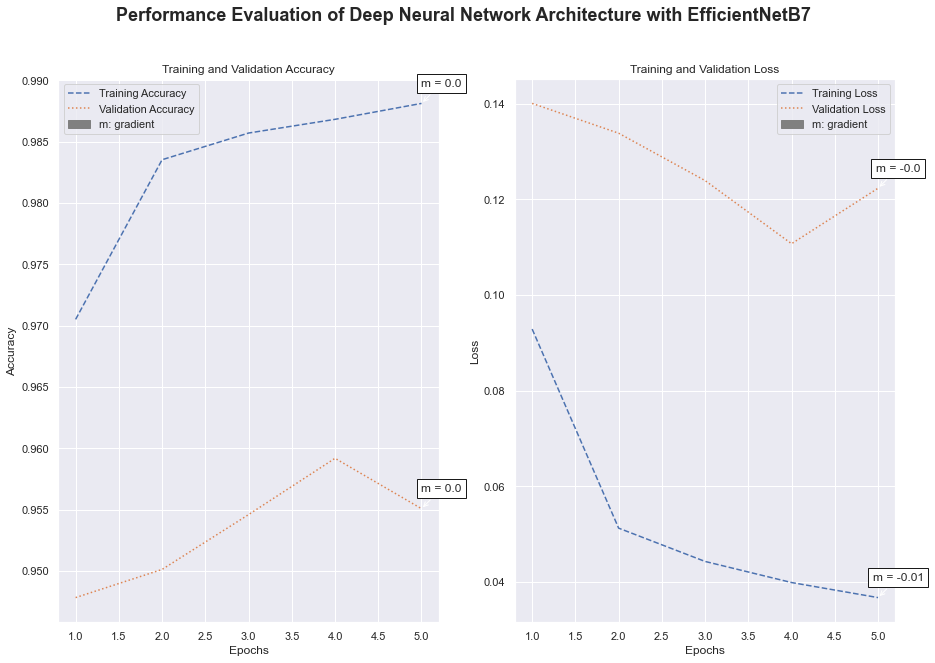

In [12]:
def vis_evaluation(history_dict, model_name):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    epochs = range(1, len(history_dict['accuracy'])+1)

    def get_gradient(y_arr, epochs):
        return round((y_arr[-1] - y_arr[0]) / (epochs[-1] - epochs[0]),2)

    def vis_sub_evaluation(n, Accuracy, train_acc, val_acc, epochs):
        axs[n].plot(epochs, train_acc, label=f'Training {Accuracy}', ls='--')
        axs[n].plot(epochs, val_acc, label=f'Validation {Accuracy}', ls='dotted')

        axs[n].set_title(f'Training and Validation {Accuracy}')
        axs[n].set_xlabel('Epochs')
        axs[n].set_ylabel(Accuracy)
        
        handles, labels = axs[n].get_legend_handles_labels()
        m_patch = mpatches.Patch(color='grey',label='m: gradient')
        handles.append(m_patch) 
        axs[n].legend(handles=handles)
        
        def annotate_box(train_acc):
            return AnnotationBbox(TextArea(f"m = {get_gradient(train_acc, epochs)}"), (epochs[-1], train_acc[-1]),
                            xybox=(20, 20),
                            xycoords='data',
                            boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        axs[n].add_artist(annotate_box(train_acc))
        axs[n].add_artist(annotate_box(val_acc))

    train_acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    vis_sub_evaluation(0, 'Accuracy', train_acc, val_acc, epochs)

    train_loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    vis_sub_evaluation(1, 'Loss', train_loss, val_loss, epochs)
    
    plt.suptitle(f"Performance Evaluation of {model_name}",fontsize=18, fontweight='bold')
    plt.show()
    
history_dict = history_5.history
vis_evaluation(history_dict, 'Deep Neural Network Architecture with EfficientNetB7')

In [10]:
# pip install pyyaml h5py  

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model_5.save('saved_model/my_model') 

In [ ]:
# Load the model 
saved_model_eff = tf.keras.models.load_model('my_model.h5')

In [13]:
# plot_loss_curves(history_5)


NameError: name 'plot_loss_curves' is not defined

## VGG16 pretrained model

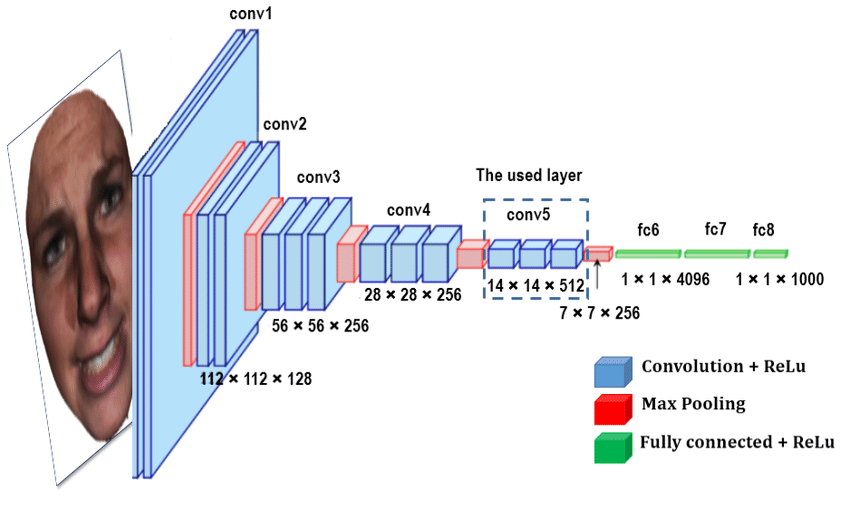

In [10]:
#We will use the augmented train dataset

#Loading the model:
from tensorflow.keras.applications.vgg16 import VGG16

base_model_vgg = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')


In [11]:
for layer in base_model_vgg.layers: #Since we don’t have to train all the layers, we make them non_trainable:
    print(layer.name)
    layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [12]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(base_model_vgg.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_vgg = tf.keras.models.Model(base_model_vgg.input, x) #merge the original VGG-16 layers, with our custom layers.

model_vgg.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgghist = model_vgg.fit(train_data_augmented,
                        validation_data = val_data,
                        steps_per_epoch = 100,
                        batch_size = 32,
                        epochs = 10)

In [ ]:
history_vgg = vgghist.history
vis_evaluation(history_vgg, 'Deep Neural Network Architecture with VGG16')